In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Define Dataset Path and Parameters
dataset_path = '/content/drive/MyDrive/pharyngitis_balanced'
batch_size = 32
image_size = (224, 224)

In [ ]:
# Preprocess Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, # 20% for validation
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 510 images belonging to 3 classes.
Found 126 images belonging to 3 classes.


In [ ]:
# Load VGG16 Model
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
vgg_base.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Build the Model
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

In [ ]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the Model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 537s 26s/step - accuracy: 0.3869 - loss: 1.2531 - val_accuracy: 0.6746 - val_loss: 0.7204
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 403s 23s/step - accuracy: 0.6245 - loss: 0.8205 - val_accuracy: 0.7460 - val_loss: 0.5807
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 372s 23s/step - accuracy: 0.7021 - loss: 0.6673 - val_accuracy: 0.7302 - val_loss: 0.5572
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 384s 24s/step - accuracy: 0.6965 - loss: 0.6383 - val_accuracy: 0.8889 - val_loss: 0.4226
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 426s 23s/step - accuracy: 0.7403 - loss: 0.5718 - val_accuracy: 0.8889 - val_loss: 0.3997
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 390s 24s/step - accuracy: 0.7785 - loss: 0.5034 - val_accuracy: 0.8492 - val_loss: 0.4026
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 366s 23s/step - accuracy: 0.7886 - loss: 0.4816 - val_accuracy: 0.8651 - val_loss: 0.4002
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 366s 23s/step - accuracy: 0.8037 - loss: 0.4961 - val_accuracy: 0.8333 - val_

In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 73s 18s/step - accuracy: 0.8103 - loss: 0.3954
Validation Accuracy: 81.75%
Validation Loss: 0.3791


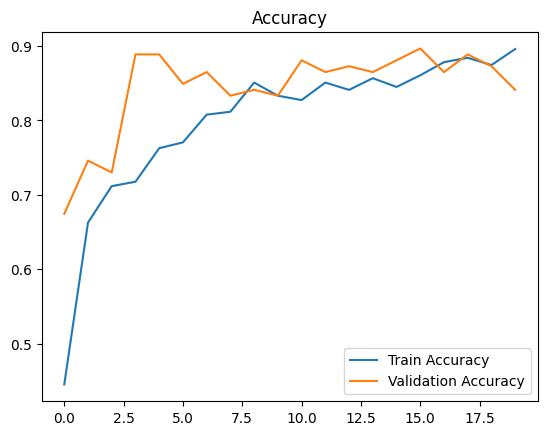

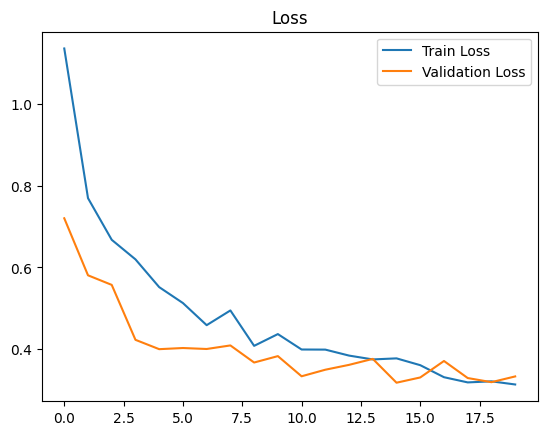

In [ ]:
# Evaluate the Model
# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
# Save the Model
model.save('/content/drive/MyDrive/pharyngitis_vgg16_model.h5')
print("Model saved successfully!")

Model saved successfully!
